<a href="https://colab.research.google.com/github/adidonner/Machine-Deep-Leap-learning-Python-Based/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import os

# Replace the directory path with your desired directory
directory_path = '/content/drive/MyDrive/resized_drone_data'

# Get the list of files in the directory
file_list = os.listdir(directory_path)

# Print the number of files in the directory
num_files = len(file_list)
print(f'Number of files in {directory_path}: {num_files}')


Number of files in /content/drive/MyDrive/resized_drone_data: 0


In [6]:
import os

# Replace the directory path with your desired directory
directory_path = '/content/drive/MyDrive/drone_data'

# Get the list of files in the directory
file_list = os.listdir(directory_path)

# Print the number of files in the directory
num_files = len(file_list)
print(f'Number of files in {directory_path}: {num_files}')


Number of files in /content/drive/MyDrive/drone_data: 8140


Take the files  "*.jpg" and "*.txt" in "/content/drive/MyDrive/drone_data" and prepare them to work with a neural network ,YOLOv8 format. From each image corp the drone and Save it in the folder "/content/drive/MyDrive/my_drone_data"

In [17]:
import os
import cv2
import tensorflow as tf

# Check if GPU is available
if tf.test.gpu_device_name():
    print('GPU device found:', tf.test.gpu_device_name())
else:
    print("No GPU found. Please make sure you have GPU support enabled.")

data_dir = "/content/drive/MyDrive/drone_data"
output_dir = "/content/drive/MyDrive/my_drone_data"

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Create a report file
report_path = os.path.join(output_dir, "report.txt")
with open(report_path, "w") as report_file:
    report_file.write("Processed Images Report:\n\n")

    # Iterate through each image file in the specified directory
    for file_name in os.listdir(data_dir):
        if file_name.endswith(".jpg") or file_name.endswith(".txt"):
            # Read the image
            img_path = os.path.join(data_dir, file_name)

            # Add error handling for image reading
            image = cv2.imread(img_path)
            if image is None:
                report_file.write(f"Error reading image: {img_path}\n")
                continue

            # Read the corresponding annotation file
            annotation_path = os.path.join(data_dir, file_name.replace(".jpg", ".txt"))
            with open(annotation_path, "r") as f:
                # Read the line and split it into five values
                class_label, x_center, y_center, width, height = [float(coord) for coord in f.readline().split()]

            # Convert to YOLO format (xmin, ymin, xmax, ymax)
            xmin = int((x_center - width / 2) * image.shape[1])
            ymin = int((y_center - height / 2) * image.shape[0])
            xmax = int((x_center + width / 2) * image.shape[1])
            ymax = int((y_center + height / 2) * image.shape[0])

            # Crop the drone from the image
            drone_crop = image[ymin:ymax, xmin:xmax]

            # Save the cropped image to the output directory
            output_path = os.path.join(output_dir, file_name.replace(".jpg", "_drone.jpg"))
            cv2.imwrite(output_path, drone_crop)

            # Write information to the report file
            report_file.write(f"Processed: {file_name} -> {output_path}\n")

print("Processing complete. Report generated at:", report_path)


GPU device found: /device:GPU:0
Processing complete. Report generated at: /content/drive/MyDrive/my_drone_data/report.txt


Take the files  "*.jpg" and "*.txt" in "/content/drive/MyDrive/bird_data" and prepare them to work with a neural network ,YOLOv8 format. From each image corp the drone and Save it in the folder "/content/drive/MyDrive/my_bird_data"

In [18]:
import os
import cv2
import tensorflow as tf

# Check if GPU is available
if tf.test.gpu_device_name():
    print('GPU device found:', tf.test.gpu_device_name())
else:
    print("No GPU found. Please make sure you have GPU support enabled.")

data_dir = "/content/drive/MyDrive/bird_data"
output_dir = "/content/drive/MyDrive/my_bird_data"

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Create a report file
report_path = os.path.join(output_dir, "report.txt")
with open(report_path, "w") as report_file:
    report_file.write("Processed Images Report:\n\n")

    # Iterate through each image file in the specified directory
    for file_name in os.listdir(data_dir):
        if file_name.endswith(".jpg") or file_name.endswith(".txt"):
            # Read the image
            img_path = os.path.join(data_dir, file_name)

            # Add error handling for image reading
            image = cv2.imread(img_path)
            if image is None:
                report_file.write(f"Error reading image: {img_path}\n")
                continue

            # Read the corresponding annotation file
            annotation_path = os.path.join(data_dir, file_name.replace(".jpg", ".txt"))
            with open(annotation_path, "r") as f:
                # Read the line and split it into five values
                class_label, x_center, y_center, width, height = [float(coord) for coord in f.readline().split()]

            # Convert to YOLO format (xmin, ymin, xmax, ymax)
            xmin = int((x_center - width / 2) * image.shape[1])
            ymin = int((y_center - height / 2) * image.shape[0])
            xmax = int((x_center + width / 2) * image.shape[1])
            ymax = int((y_center + height / 2) * image.shape[0])

            # Crop the drone from the image
            drone_crop = image[ymin:ymax, xmin:xmax]

            # Save the cropped image to the output directory
            output_path = os.path.join(output_dir, file_name.replace(".jpg", "_drone.jpg"))
            cv2.imwrite(output_path, drone_crop)

            # Write information to the report file
            report_file.write(f"Processed: {file_name} -> {output_path}\n")

print("Processing complete. Report generated at:", report_path)


GPU device found: /device:GPU:0
Processing complete. Report generated at: /content/drive/MyDrive/my_bird_data/report.txt


RESIZE to 32x32 the images in the files /content/drive/MyDrive/my_bird_data
/content/drive/MyDrive/my_drone_data

In [19]:
import os
import cv2
from tqdm import tqdm

# Paths to the directories containing the images
bird_data_path = "/content/drive/MyDrive/my_bird_data"
drone_data_path = "/content/drive/MyDrive/my_drone_data"

# Path to save the resized images
resized_bird_data_path = "/content/drive/MyDrive/resized_bird_data"
resized_drone_data_path = "/content/drive/MyDrive/resized_drone_data"

# Ensure the output directories exist
os.makedirs(resized_bird_data_path, exist_ok=True)
os.makedirs(resized_drone_data_path, exist_ok=True)

# Function to resize images to 32x32
def resize_image(image_path, output_path):
    img = cv2.imread(image_path)
    resized_img = cv2.resize(img, (32, 32))
    cv2.imwrite(output_path, resized_img)

# Resize images in the bird data directory
for filename in tqdm(os.listdir(bird_data_path)):
    if filename.endswith(".jpg"):
        input_path = os.path.join(bird_data_path, filename)
        output_path = os.path.join(resized_bird_data_path, filename)
        resize_image(input_path, output_path)

# Resize images in the drone data directory
for filename in tqdm(os.listdir(drone_data_path)):
    if filename.endswith(".jpg"):
        input_path = os.path.join(drone_data_path, filename)
        output_path = os.path.join(resized_drone_data_path, filename)
        resize_image(input_path, output_path)


100%|██████████| 4071/4071 [1:06:16<00:00,  1.02it/s] 


In [2]:
import os
import cv2
from tqdm import tqdm

# Paths to the directories containing the images
drone_data_path = "/content/drive/MyDrive/my_drone_data"

# Path to save the resized images
resized_drone_data_path = "/content/drive/MyDrive/resized_drone_data"

# Ensure the output directories exist
os.makedirs(resized_drone_data_path, exist_ok=True)

# Function to resize images to 32x32
def resize_image(image_path, output_path):
    img = cv2.imread(image_path)
    resized_img = cv2.resize(img, (32, 32))
    cv2.imwrite(output_path, resized_img)


# Resize images in the drone data directory
for filename in tqdm(os.listdir(drone_data_path)):
    if filename.endswith(".jpg"):
        input_path = os.path.join(drone_data_path, filename)
        output_path = os.path.join(resized_drone_data_path, filename)
        resize_image(input_path, output_path)


100%|██████████| 4071/4071 [03:18<00:00, 20.51it/s] 


In [16]:
# !rm -rf /content/drive/MyDrive/my_drone_data


crop a random 32x32 part of each image.
Save processed images and labels.
input_folder = '/content/drive/MyDrive/drone_data'
output_folder = '/content/drive/MyDrive/other_data'.
use GPU

In [ ]:
import os
import random
import cv2
import torch
from torchvision import transforms

# Set the paths
input_folder = '/content/drive/MyDrive/drone_data'
output_folder = '/content/drive/MyDrive/other_data'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Set device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Function to crop a random 32x32 part of an image
def crop_random_32x32(image):
    height, width, _ = image.shape
    top = random.randint(0, height - 32)
    left = random.randint(0, width - 32)
    cropped_image = image[top:top + 32, left:left + 32, :]
    return cropped_image, top, left

# Process each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg'):
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)

        # Crop a random 32x32 part of the image
        cropped_image, top, left = crop_random_32x32(image)

        # Save the processed image
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, cropped_image)

        # Save the label information (filename and random crop coordinates)
        label_file_path = os.path.join(output_folder, 'labels.txt')
        with open(label_file_path, 'a') as label_file:
            label_file.write(f"{filename} {top} {left}\n")

print(f"Random 32x32 crops of images have been saved in {output_folder}.")


The same with bird_data


In [6]:
import os
import random
import cv2
import torch
from torchvision import transforms

# Set the paths
input_folder = '/content/drive/MyDrive/bird_data'
output_folder = '/content/drive/MyDrive/other_data'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Set device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Function to crop a random 32x32 part of an image
def crop_random_32x32(image):
    height, width, _ = image.shape
    top = random.randint(0, height - 32)
    left = random.randint(0, width - 32)
    cropped_image = image[top:top + 32, left:left + 32, :]
    return cropped_image, top, left

# Process each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg'):
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)

        # Crop a random 32x32 part of the image
        cropped_image, top, left = crop_random_32x32(image)

        # Save the processed image
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, cropped_image)

        # Save the label information (filename and random crop coordinates)
        label_file_path = os.path.join(output_folder, 'labels.txt')
        with open(label_file_path, 'a') as label_file:
            label_file.write(f"{filename} {top} {left}\n")

print(f"Random 32x32 crops of images have been saved in {output_folder}.")


Random 32x32 crops of images have been saved in /content/drive/MyDrive/other_data.


take the first 9 images from "/content/drive/MyDrive/drone_data" and use the augmentation function of Keras and print new images

<ipython-input-6-1475088362a1>:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(image_list)


IndexError: ignored

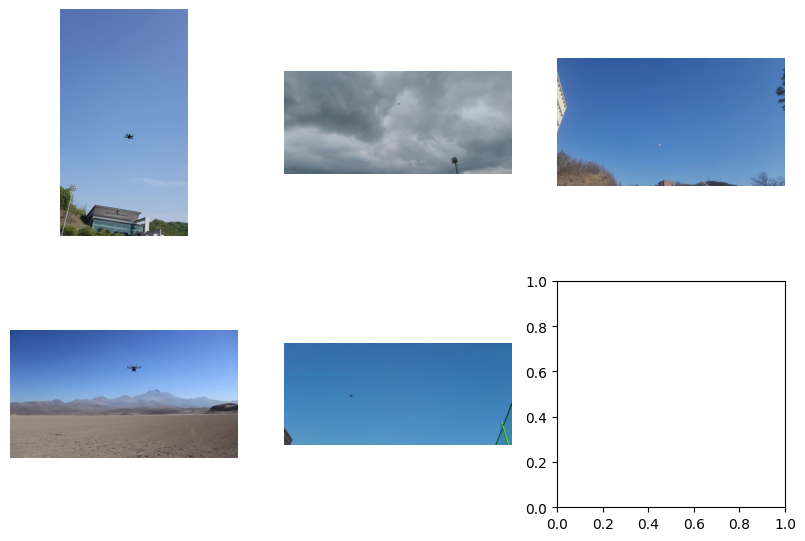

In [6]:
import os
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Set the path to the input folder
input_folder = '/content/drive/MyDrive/drone_data'

# Function to load and preprocess an image
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image = image.astype(np.float32) / 255.0  # Normalize to [0,1]
    return image

# Load the first 9 images
image_list = []
for filename in os.listdir(input_folder)[:9]:
    if filename.endswith('.jpg'):
        image_path = os.path.join(input_folder, filename)
        image = load_image(image_path)
        image_list.append(image)

# Convert the list to a numpy array
images = np.array(image_list)

# Create an ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Plot the original images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
plt.suptitle('Original Images')
plt.show()

# Generate augmented images and plot them
augmented_images = datagen.flow(images, batch_size=9)
augmented_images = next(augmented_images)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.suptitle('Augmented Images')
plt.show()
